In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import timeit
from sklearn.cluster import KMeans, MiniBatchKMeans
import numpy as np
%matplotlib inline

In [ ]:
reptn=15
n_clusters=[5, 10, 25, 50, 100, 200, 500 ]
cluster_size=[str(i) for i in n_clusters]
max_iterations=[5, 10, 25, 50, 100, 300]
init_methods=['k-means++', 'random']
#n_clusters=20
col_list=['max_iterations', 'init_method', 'cluster_size', 'values','avg', 'max', 'min']

In [ ]:
col_list

In [ ]:
def addrow(max_iterations,init_method,cluster_size):
    X=dict()
    X['max_iterations']=max_iterations
    X['init_method']=init_method
    X['cluster_size']=cluster_size
    X['values']=[]
    X['avg']=0
    X['max']=0
    X['min']=0
    return X

In [ ]:
# timing_results=pd.DataFrame(columns=col_list)
# quantizationerror_results=pd.DataFrame(columns=col_list)
# for j in max_iterations:
#     for k in init_methods:
#         X=addrow(j,k)
#         timing_results.loc[len(timing_results)]=addrow(j,k)
#         quantizationerror_results.loc[len(quantizationerror_results)]=addrow(j,k)

In [ ]:
earthquakes_df=pd.read_csv('global-earthquakes.csv', header=0)
earthquakes_df.shape

In [ ]:
# row=-1
# for j in max_iterations:
#     for k in init_methods:
#         row+=1
#         print("processing ", j , k)
#         for i in n_clusters:
#             for r in range(reptn):
#                 start_time = timeit.default_timer()
#                 kmeans = KMeans(n_clusters=i,init=k,max_iter=j)
#                 kmeans.fit(earthquakes_df)
#                 elapsed = timeit.default_timer() - start_time
#                 print("cluster_size :", i, "time :", elapsed, "quant_error :", kmeans.inertia_)
#                 timing_results.loc[row][str(i)].append(elapsed)
#                 quantizationerror_results.loc[row][str(i)].append(kmeans.inertia_)

In [ ]:
timing=dict()
error=dict()
for r in range(reptn):
    for i in n_clusters:
        for k in init_methods:
            centroids=[]
            for j in max_iterations:
                label=str(i)+'_'+str(k)+'_'+str(j)
                if (label not in timing.keys()):
                    timing[label]=[]
                    error[label]=[]
                start_time = timeit.default_timer()
                if (j==5):
                    kmeans = KMeans(n_clusters=i,init=k,max_iter=j)
                else:
                    kmeans = KMeans(n_clusters=i,init=centroids,max_iter=j)
                kmeans.fit(earthquakes_df)
                elapsed = timeit.default_timer() - start_time
                print(r,"cluster_size :", i, "iterations", j, "time :", elapsed, "quant_error :", kmeans.inertia_)
                centroids=kmeans.cluster_centers_
                timing[label].append(elapsed)
                error[label].append(kmeans.inertia_)
                #print(timing,error)

In [ ]:
timing.keys()

In [ ]:
timing_results=pd.DataFrame(columns=col_list)
quantizationerror_results=pd.DataFrame(columns=col_list)
for i in n_clusters:
    for j in max_iterations:
        for k in init_methods:
            label=str(i)+'_'+str(k)+'_'+str(j)
            X=addrow(j,k,i)
            X['values']=timing[label]
            X['avg']=sum(timing[label])/len(timing[label])
            X['max']=max(timing[label])
            X['min']=min(timing[label])
            timing_results.loc[len(timing_results)]=X
            X['values']=error[label]
            X['avg']=sum(error[label])/len(error[label])
            X['max']=max(error[label])
            X['min']=min(error[label])
            quantizationerror_results.loc[len(quantizationerror_results)]=X

In [ ]:
timing_results

In [ ]:
quantizationerror_results

In [ ]:
# plt.figure(figsize=(15,15))
# for i in range(len(timing_results)):
#     plt.plot(cluster_size, [max(i) for i in timing_results.loc[i][cluster_size]], label=(str(timing_results.loc[i]['max_iterations'])+str(timing_results.loc[i]['init_method'])))
# plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)


In [ ]:
quantizationerror_results.to_csv('q_dict.csv')
timing_results.to_csv('t_dict.csv')

In [ ]:
# quantizationerror_results

In [ ]:
# plt.figure(figsize=(15,15))
# for i in range(len(quantizationerror_results)):
#     plt.plot(cluster_size, [i for i in quantizationerror_results.loc[i][cluster_size]], label=(str(quantizationerror_results.loc[i]['max_iterations'])+str(quantizationerror_results.loc[i]['init_method'])))
# plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)


In [ ]:
# earthquakes_df['hr']=(earthquakes_df['Time']/10000).astype(int)
# earthquakes_df['min']=((earthquakes_df['Time']%10000)/100).astype(int)
# earthquakes_df['sec']=(earthquakes_df['Time']%100).astype(int)
# earthquakes_df['Depth']=earthquakes_df['Depth']/100
# earthquakes_df['Latitude']=earthquakes_df['Latitude']/45
# earthquakes_df['Longitude']=earthquakes_df['Longitude']/90
# earthquakes_df=earthquakes_df.drop('Time',1)
# earthquakes_df

In [ ]:
earthquakes_df

In [ ]:
timing2=dict()
error2=dict()
for r in range(reptn):
    for i in n_clusters:
        for k in init_methods:
            centroids=[]
            for j in max_iterations:
                label=str(i)+'_'+str(k)+'_'+str(j)
                if (label not in timing.keys()):
                    timing[label]=[]
                    error[label]=[]
                start_time = timeit.default_timer()
                if (j==5):
                    kmeans = MiniBatchKMeans(n_clusters=i,init=k,max_iter=j,batch_size=1000 )
                else:
                    kmeans = MiniBatchKMeans(n_clusters=i,init=centroids,max_iter=j,batch_size=1000)
                kmeans.fit(earthquakes_df)
                elapsed = timeit.default_timer() - start_time
                print(r,"cluster_size :", i, "iterations", j, "time :", elapsed, "quant_error :", kmeans.inertia_)
                centroids=kmeans.cluster_centers_
                timing[label].append(elapsed)
                error[label].append(kmeans.inertia_)
                #print(timing,error)

In [ ]:
timing2.keys()

In [ ]:
timing_results2=pd.DataFrame(columns=col_list)
quantizationerror_results2=pd.DataFrame(columns=col_list)
for i in n_clusters:
    for j in max_iterations:
        for k in init_methods:
            label=str(i)+'_'+str(k)+'_'+str(j)
            X=addrow(j,k,i)
            X['values']=timing[label]
            X['avg']=sum(timing[label])/len(timing[label])
            X['max']=max(timing[label])
            X['min']=min(timing[label])
            timing_results2.loc[len(timing_results2)]=X
            X['values']=error[label]
            X['avg']=sum(error[label])/len(error[label])
            X['max']=max(error[label])
            X['min']=min(error[label])
            quantizationerror_results2.loc[len(quantizationerror_results2)]=X
            
quantizationerror_results2.to_csv('q_minibatch.csv')
timing_results2.to_csv('t_minibatch.csv')

In [ ]:
quantizationerror_results2

In [ ]:
# timing_results

# plt.figure(figsize=(15,15))
# for i in range(len(timing_results)):
#     plt.plot(cluster_size, [i for i in timing_results.loc[i][cluster_size]], label=(str(timing_results.loc[i]['max_iterations'])+str(timing_results.loc[i]['init_method'])))
# plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)


# quantizationerror_results

# plt.figure(figsize=(15,15))
# for i in range(len(quantizationerror_results)):
#     plt.plot(cluster_size, [i for i in quantizationerror_results.loc[i][cluster_size]], label=(str(quantizationerror_results.loc[i]['max_iterations'])+str(quantizationerror_results.loc[i]['init_method'])))
# plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)




In [20]:
timing_results=pd.read_csv('New folder/t_dict.csv', index_col=None)
quantizationerror_results=pd.read_csv('New folder/q_dict.csv', index_col=None)

In [7]:
timing_results

,Unnamed: 0,max_iterations,init_method,cluster_size,values,avg,max,min
0,0,5,k-means++,5,"[0.830860314393135, 0.864682609646195, 0.97538...",0.932720,1.252762,0.830860
1,1,5,random,5,"[0.7358865138190254, 0.8296603595280772, 0.702...",0.813877,1.094836,0.702738
2,2,10,k-means++,5,"[0.04109713181520647, 0.06614702708799314, 0.0...",0.053092,0.083813,0.041097
3,3,10,random,5,"[0.03812421983536751, 0.09163734070534701, 0.0...",0.087543,0.134810,0.038124
4,4,25,k-means++,5,"[0.0395949843790504, 0.04527951931282814, 0.04...",0.044708,0.062171,0.039595
5,5,25,random,5,"[0.033843099642410834, 0.06417836766644314, 0....",0.057298,0.116961,0.033843
6,6,50,k-means++,5,"[0.039700769409762415, 0.046335606536104024, 0...",0.045137,0.058156,0.039701
7,7,50,random,5,"[0.03706460644445997, 0.06229292580241008, 0.0...",0.047822,0.062293,0.035895
8,8,100,k-means++,5,"[0.03760446271780893, 0.04280450221091314, 0.0...",0.045241,0.067878,0.037604
9,9,100,random,5,"[0.04159220575888867, 0.05930485130153329, 0.0...",0.046751,0.062772,0.036916


In [22]:
quantizationerror_results

,Unnamed: 0,max_iterations,init_method,cluster_size,values,avg,max,min
0,0,5,k-means++,5,"[11313571652102.545, 11298568810179.576, 11303...",1.129991e+13,1.132626e+13,1.129312e+13
1,1,5,random,5,"[11316670382209.609, 11299418115026.381, 11334...",1.139558e+13,1.193883e+13,1.129942e+13
2,2,10,k-means++,5,"[11313463556603.598, 11294673300292.572, 11293...",1.129795e+13,1.132625e+13,1.129312e+13
3,3,10,random,5,"[11316458104709.889, 11294337231885.254, 11333...",1.136775e+13,1.184085e+13,1.129395e+13
4,4,25,k-means++,5,"[11313402283828.049, 11294168972931.684, 11293...",1.129778e+13,1.132625e+13,1.129312e+13
5,5,25,random,5,"[11316299148696.873, 11293945509150.381, 11316...",1.133638e+13,1.184081e+13,1.129364e+13
6,6,50,k-means++,5,"[11313285684324.758, 11293852450596.244, 11293...",1.129767e+13,1.132625e+13,1.129312e+13
7,7,50,random,5,"[11316222363418.42, 11293643599936.313, 113164...",1.133612e+13,1.184075e+13,1.129349e+13
8,8,100,k-means++,5,"[11313192692424.703, 11293618224981.512, 11293...",1.129759e+13,1.132625e+13,1.129312e+13
9,9,100,random,5,"[11316190587297.965, 11293490107653.15, 113162...",1.133594e+13,1.184072e+13,1.129338e+13


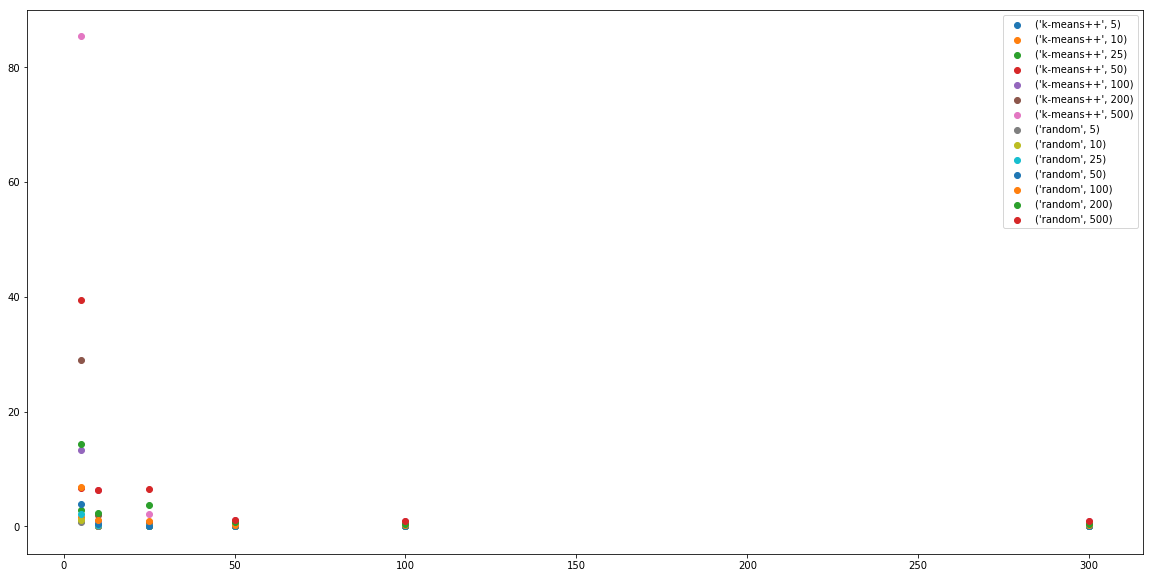

In [17]:
fig, ax = plt.subplots(figsize=(20,10))
for label, df in timing_results.groupby(['init_method','cluster_size']):
    plt.scatter(df['max_iterations'],df['avg'], label=label)
plt.legend()

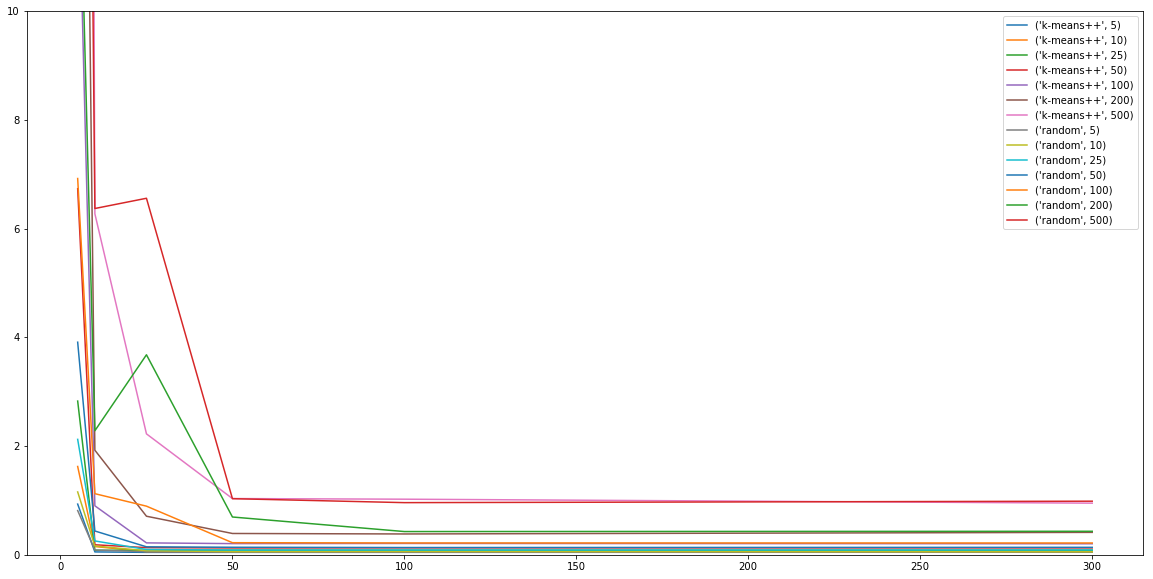

In [19]:
fig, ax = plt.subplots(figsize=(20,10))
plt.ylim([0,10])
for label, df in timing_results.groupby(['init_method','cluster_size']):
    plt.plot(df['max_iterations'],df['avg'], label=label)
plt.legend()

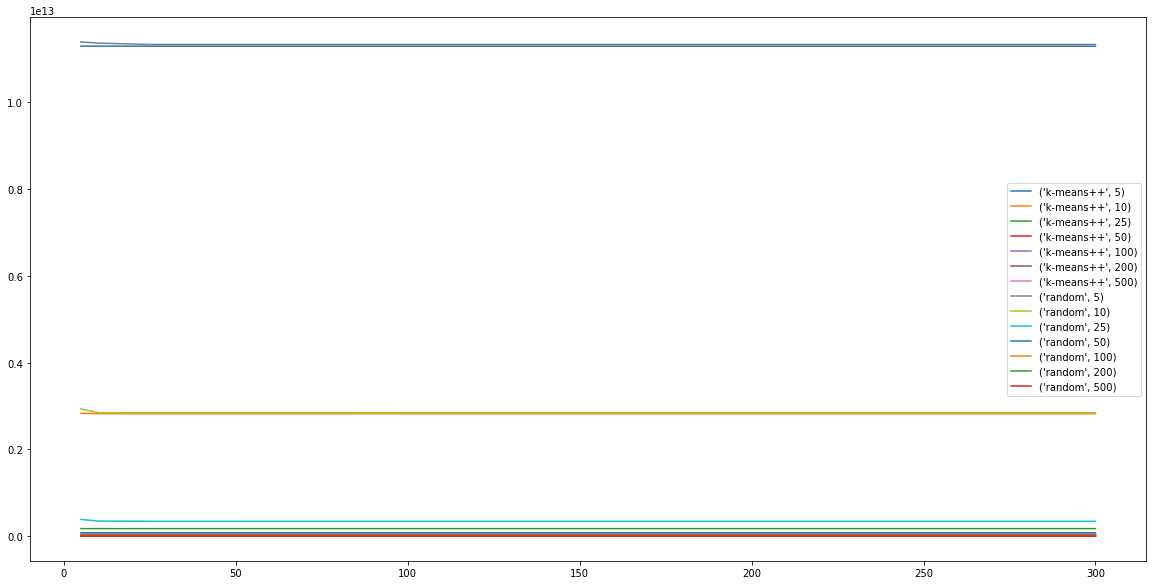

In [23]:
fig, ax = plt.subplots(figsize=(20,10))
for label, df in quantizationerror_results.groupby(['init_method','cluster_size']):
    plt.plot(df['max_iterations'],df['avg'], label=label)
plt.legend()

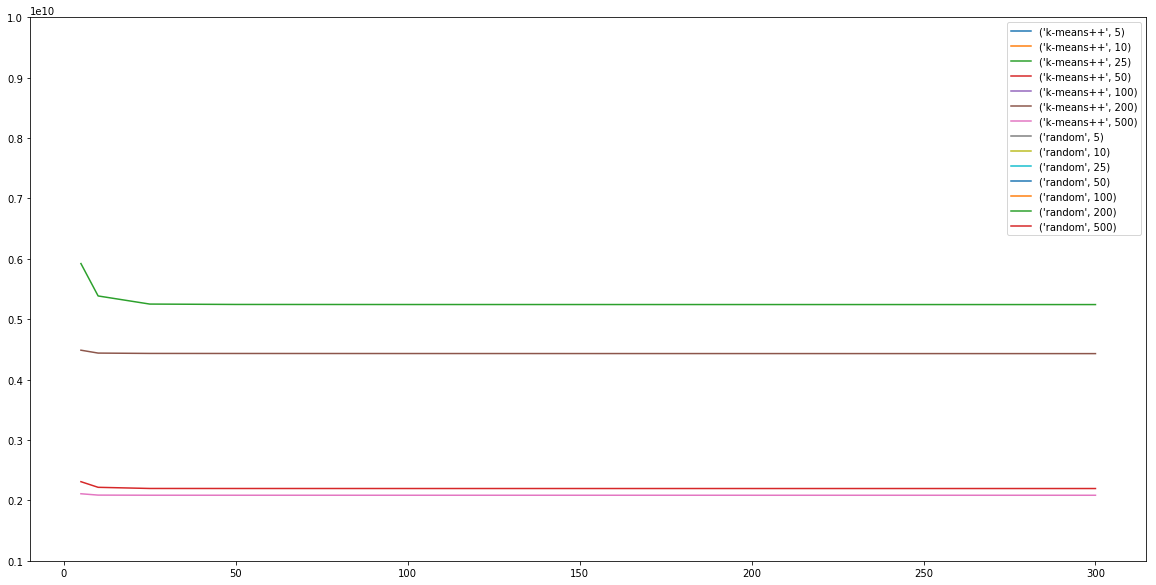

In [25]:
fig, ax = plt.subplots(figsize=(20,10))
plt.ylim([1*pow(10,9),1*pow(10,10)])
for label, df in quantizationerror_results.groupby(['init_method','cluster_size']):
    plt.plot(df['max_iterations'],df['avg'], label=label)
plt.legend()

In [26]:
timing_minibatch_results=pd.read_csv('New folder/t_minibatch.csv', index_col=None)
quantizationerror_minibatch_results=pd.read_csv('New folder/q_minibatch.csv', index_col=None)

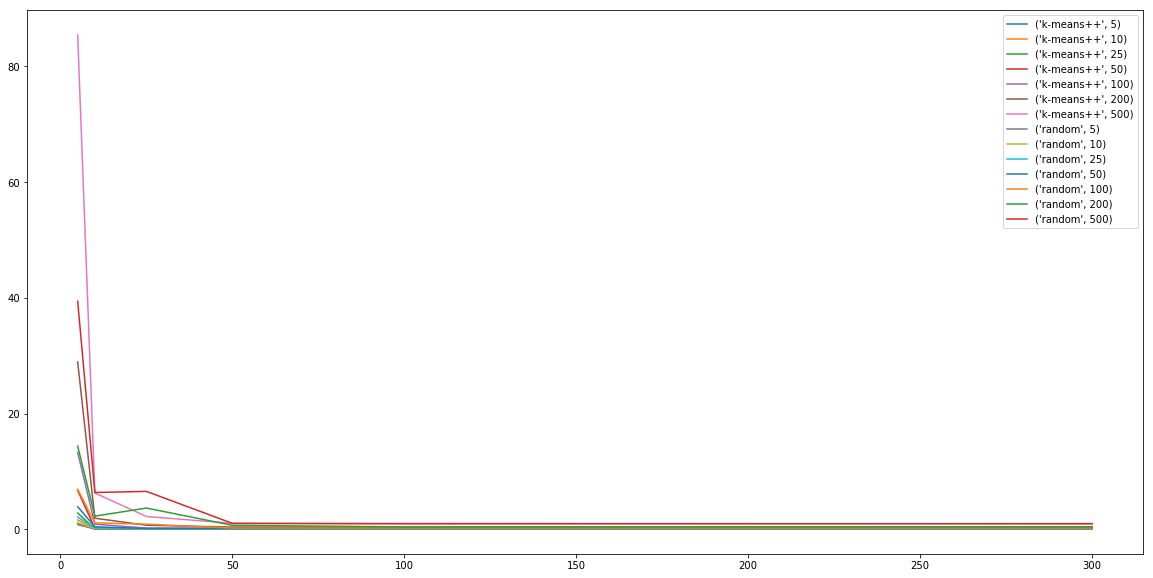

In [29]:
fig, ax = plt.subplots(figsize=(20,10))
for label, df in timing_results.groupby(['init_method','cluster_size']):
    plt.plot(df['max_iterations'],df['avg'], label=label)
plt.legend()

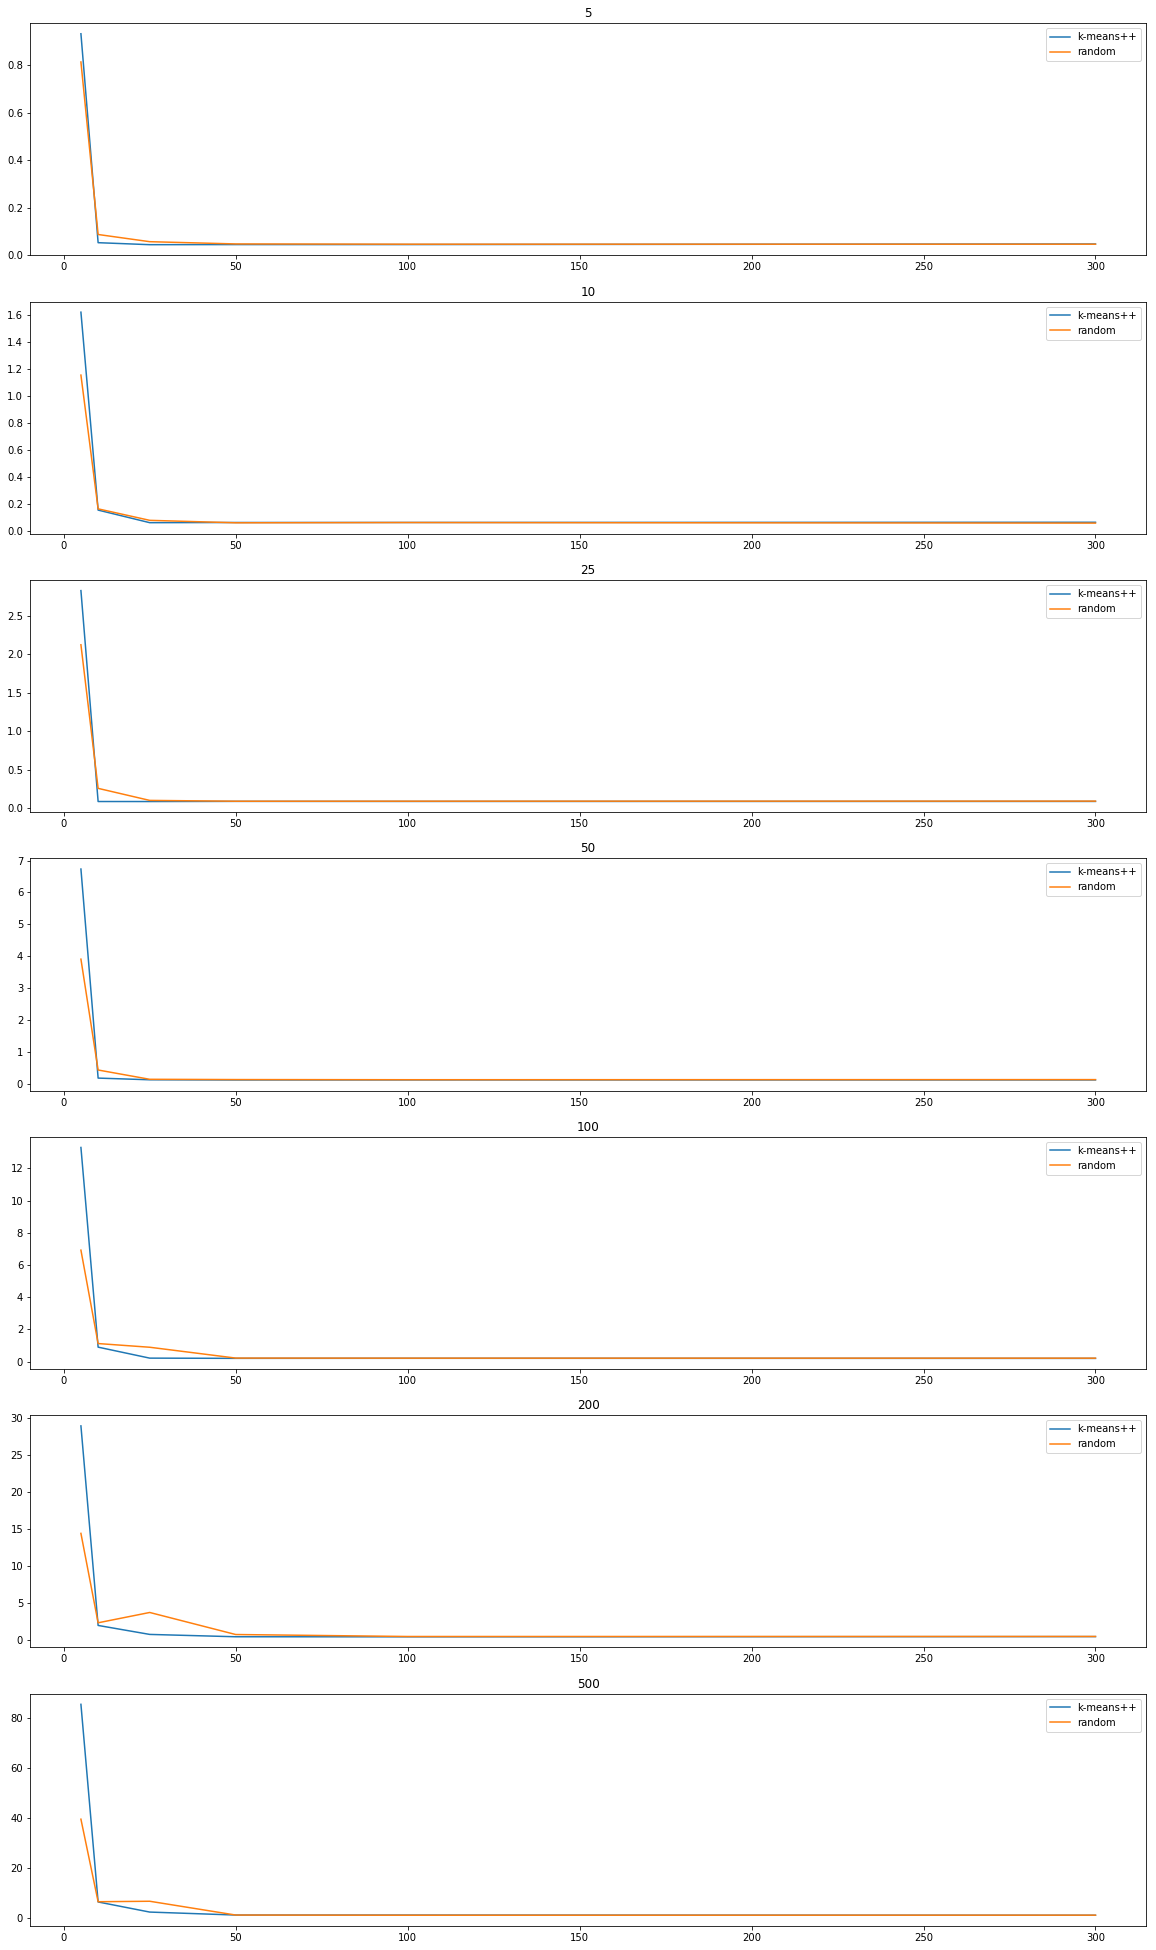

In [33]:
#fig, ax = plt.subplots(figsize=(20,10))
plt.figure(figsize=(20,35))
i=1
for title, df in timing_results.groupby(['cluster_size']):
    plt.subplot(7,1,i)
    i+=1;
    for label, df2 in df.groupby(['init_method']):
        plt.plot(df2['max_iterations'],df2['avg'], label=label)
    plt.title(title)
    plt.legend()

In [36]:
quantizationerror_minibatch_results

,Unnamed: 0,max_iterations,init_method,cluster_size,values,avg,max,min
0,0,5,k-means++,5,"[11313571652102.545, 11298568810179.576, 11303...",1.142584e+13,1.195638e+13,1.129312e+13
1,1,5,random,5,"[11316670382209.609, 11299418115026.381, 11334...",1.180922e+13,1.444465e+13,1.129942e+13
2,2,10,k-means++,5,"[11313463556603.598, 11294673300292.572, 11293...",1.134461e+13,1.192907e+13,1.129312e+13
3,3,10,random,5,"[11316458104709.889, 11294337231885.254, 11333...",1.158032e+13,1.337394e+13,1.129395e+13
4,4,25,k-means++,5,"[11313402283828.049, 11294168972931.684, 11293...",1.132567e+13,1.191760e+13,1.129312e+13
5,5,25,random,5,"[11316299148696.873, 11293945509150.381, 11316...",1.145682e+13,1.197598e+13,1.129364e+13
6,6,50,k-means++,5,"[11313285684324.758, 11293852450596.244, 11293...",1.131630e+13,1.170318e+13,1.129312e+13
7,7,50,random,5,"[11316222363418.42, 11293643599936.313, 113164...",1.143588e+13,1.194012e+13,1.129349e+13
8,8,100,k-means++,5,"[11313192692424.703, 11293618224981.512, 11293...",1.130452e+13,1.133737e+13,1.129312e+13
9,9,100,random,5,"[11316190587297.965, 11293490107653.15, 113162...",1.143370e+13,1.193031e+13,1.129338e+13


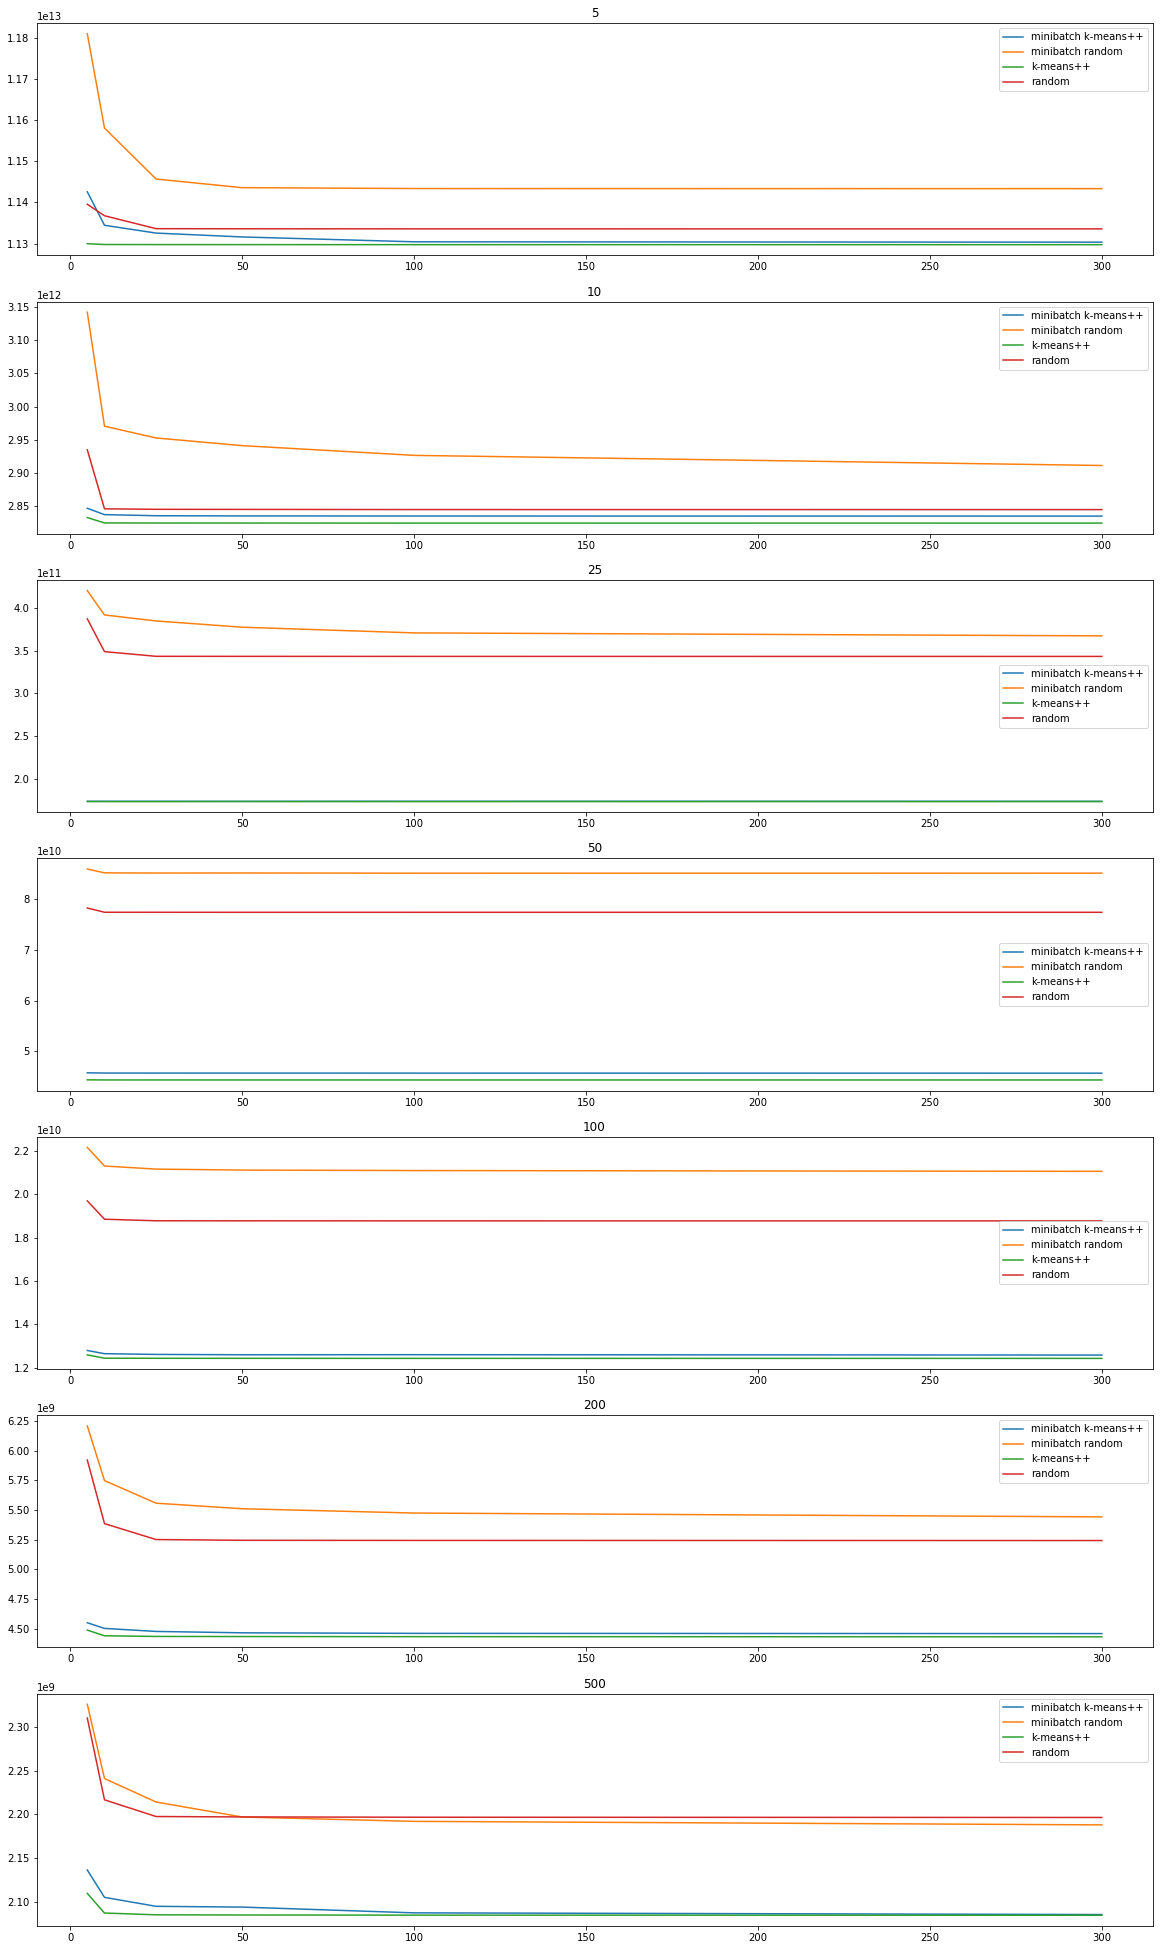

In [50]:
plt.figure(figsize=(20,35))
i=1
for title, df in quantizationerror_minibatch_results.groupby(['cluster_size']):
    plt.subplot(7,1,i)
    i+=1;
    #print(df)
    for label, df2 in df.groupby(['init_method']):
        plt.plot(df2['max_iterations'],df2['avg'], label="minibatch "+label)
    plt.title(title)
    
i=1
for title, df in quantizationerror_results.groupby(['cluster_size']):
    plt.subplot(7,1,i)
    i+=1;
    #print(df)
    for label, df2 in df.groupby(['init_method']):
        plt.plot(df2['max_iterations'],df2['avg'], label=label)
    plt.legend()

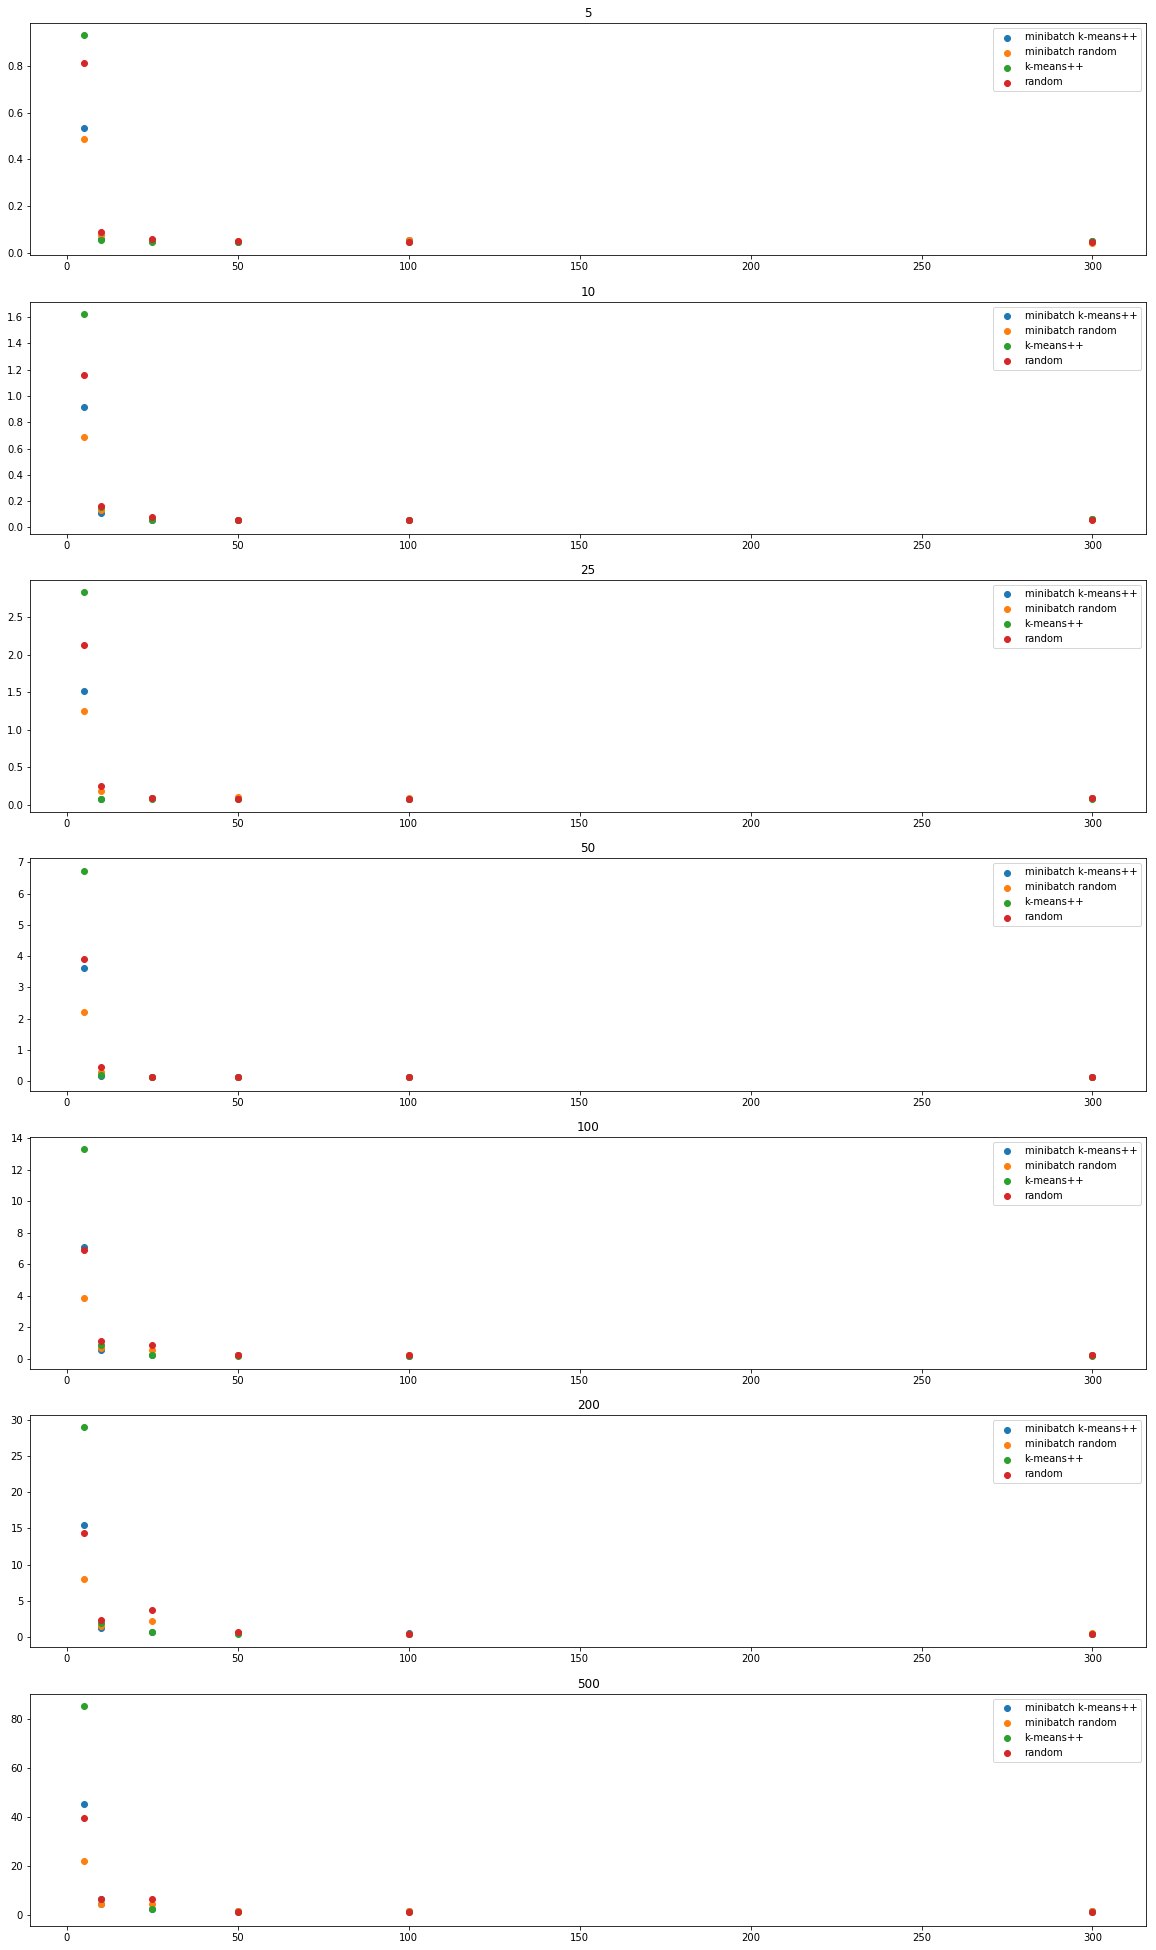

In [53]:
plt.figure(figsize=(20,35))
i=1
for title, df in timing_minibatch_results.groupby(['cluster_size']):
    plt.subplot(7,1,i)
    i+=1;
    #print(df)
    for label, df2 in df.groupby(['init_method']):
        plt.scatter(df2['max_iterations'],df2['avg'], label="minibatch "+label)
    plt.title(title)
    
i=1
for title, df in timing_results.groupby(['cluster_size']):
    plt.subplot(7,1,i)
    i+=1;
    #print(df)
    for label, df2 in df.groupby(['init_method']):
        plt.scatter(df2['max_iterations'],df2['avg'], label=label)
    plt.legend()